In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn_pandas import DataFrameMapper
!pip install shap
import shap
from shap import LinearExplainer, KernelExplainer, Explanation


In [3]:
titanic= pd.read_csv('titanic.csv')

In [4]:
titanic = titanic[(titanic['Age'].notna())  & (titanic['Fare'].notna()) & (titanic['Embarked'].notna())]
titanic = titanic.drop('Cabin', axis=1)

In [5]:
titanic_new2 = titanic.drop(['PassengerId','Name','Ticket'],axis=1)

In [6]:
titanic_new2['Sex'].replace('male','1',inplace=True)
titanic_new2['Sex'].replace('female','0',inplace=True)
titanic_new2['Embarked'].replace('C','1',inplace=True)
titanic_new2['Embarked'].replace('Q','2',inplace=True)
titanic_new2['Embarked'].replace('S','3',inplace=True)
titanic_new2 = titanic_new2.reset_index(drop=True)

In [ ]:
titanic_new2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,3
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.925,3
3,1,1,0,35.0,1,0,53.1,3
4,0,3,1,35.0,0,0,8.05,3
...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.125,2
708,0,2,1,27.0,0,0,13,3
709,1,1,0,19.0,0,0,30,3
710,1,1,1,26.0,0,0,30,1


In [17]:
X_train,X_test,y_train,y_test = train_test_split(titanic_new2.drop('Survived',axis=1), titanic_new2.Survived)

# Logistic Regression

In [19]:
model = LogisticRegression()
model.fit(X_train,y_train)
predict = model.predict(X_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['predicted no','Predicted yes'], index=['Actual no', 'Actual yes'])

In [ ]:
model.score(X_test, y_test)

0.8202247191011236

# Linear Regression

In [24]:
#Linear regression
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train.astype(float)).fit()
predict = model.predict(X_test.astype(float))
mean_absolute_error(y_test,predict)

0.30106914588335265

In [8]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     58.31
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.09e-61
Time:                        10:26:51   Log-Likelihood:                -218.41
No. Observations:                 534   AIC:                             452.8
Df Residuals:                     526   BIC:                             487.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4448      0.097     14.929      0.0

In [101]:
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


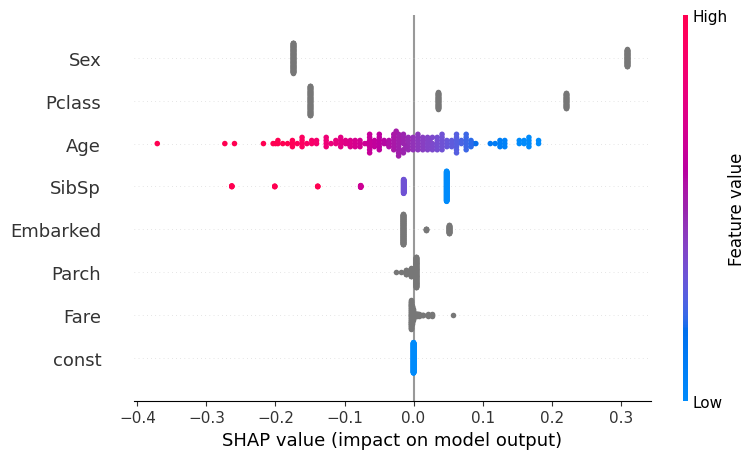

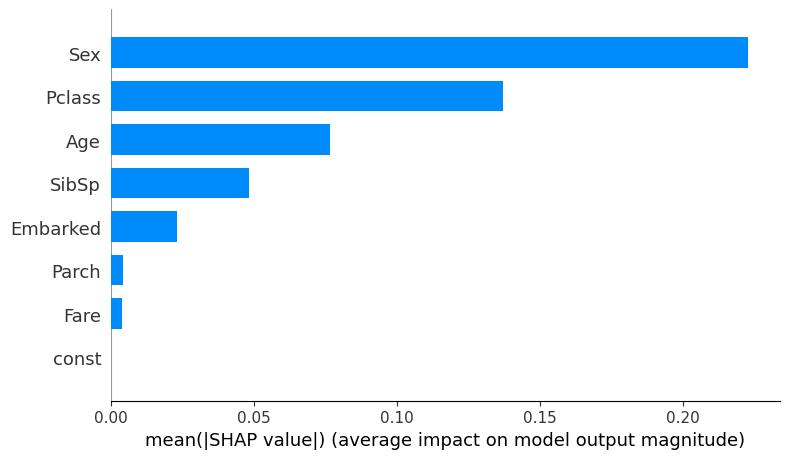

In [102]:
explainer = shap.LinearExplainer(model, X_train.astype(float), feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test.astype(float))
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_train, plot_type="bar")

TypeError: ignored

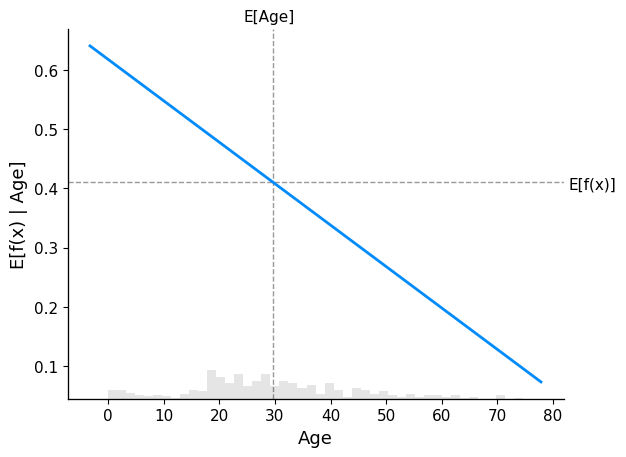

In [120]:
# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot('Age',model.predict, X_train, model_expected_value=True,
    feature_expected_value=True, ice=False,
     shap_values=shap_values[:, 0]
)

# KNearest neighbor


In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6685393258426966

# Decision tree



In [ ]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7921348314606742

<BarContainer object of 7 artists>

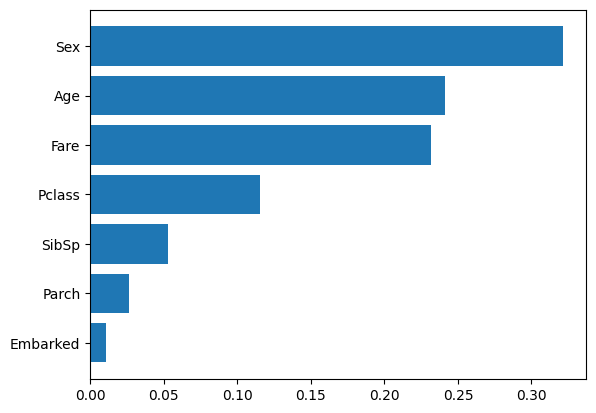

In [ ]:
sorted_idx = model.feature_importances_.argsort()
features = X_train.columns
result = sorted(zip(features, model.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

# Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7752808988764045

# Support Vector Machine


In [ ]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6292134831460674

#Neural network


In [121]:
model = MLPClassifier()
model.fit(X_train,y_train)  
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


0.7921348314606742

In [ ]:
explainer = shap.KernelExplainer(model.predict,X_train)
shap_values = explainer.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


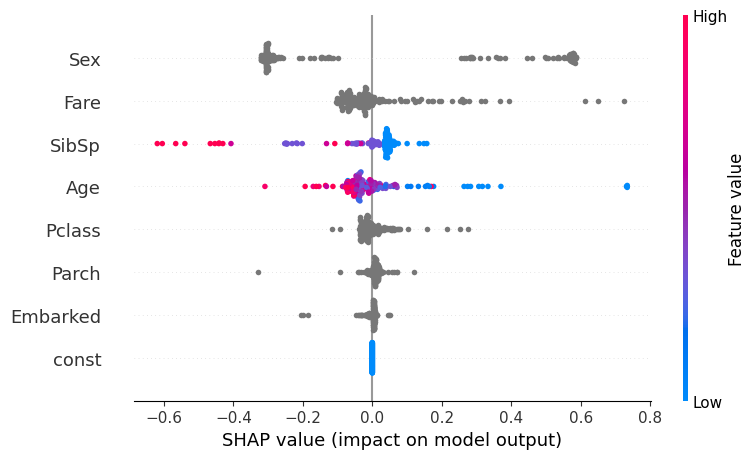

In [123]:
shap.summary_plot(shap_values,X_test)

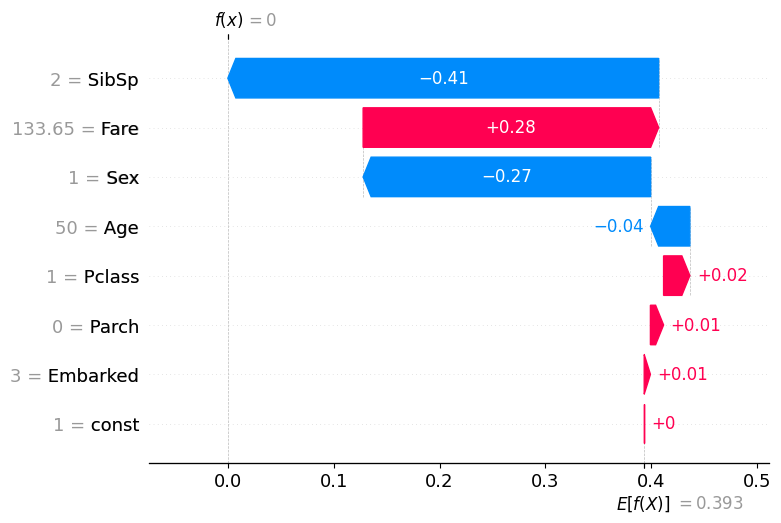

In [136]:
exp = Explanation(shap_values ,explainer.expected_value, data=X_test.values, feature_names=X_test.columns)
shap.plots.waterfall(exp[0])